In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("iris-data.csv") # загружаем наш датасет

In [3]:
data.head(10) # просматриваем первые 10 строк

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [4]:
data.info() # просматриваем интересную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data = data.dropna(subset=['petal_width_cm']) # выкидываем null значения 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [6]:
data['class'].value_counts() # можно заметить что одинаковые классы под разными именами, исправим это

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [7]:
data['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [8]:
new_data = data[data['class'] != 'Iris-virginica'] # рассмотрим только 2 класса, последний удалим
new_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
new_data['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: class, Length: 95, dtype: object

In [10]:
new_data['sepal_length_cm'].describe()

count    95.000000
mean      5.209411
std       1.366045
min       0.055000
25%       5.000000
50%       5.400000
75%       5.850000
max       7.000000
Name: sepal_length_cm, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccd19222d0>]],
      dtype=object)

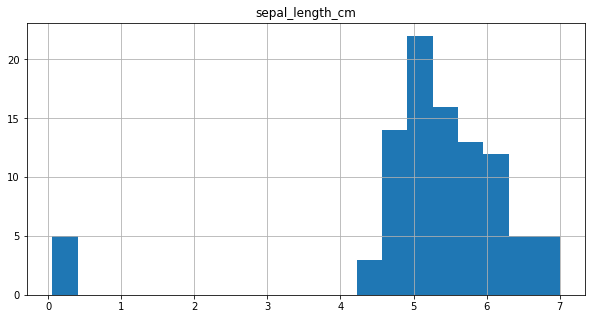

In [11]:
new_data.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5)) # строим гистограмму по столбцу "sepal_length_cm"

Заметим, что несколько точек отделились от средних показателей, поэтому примем их значения за "м" и переведем в "см"

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccd1a5ff90>]],
      dtype=object)

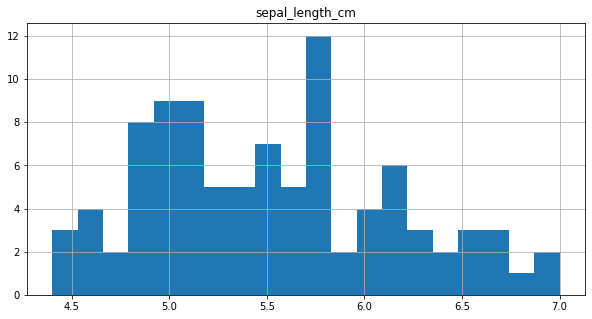

In [12]:
new_data.loc[new_data.sepal_length_cm < 1, ['sepal_length_cm']] = new_data['sepal_length_cm']*100
new_data.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccd1c27390>]],
      dtype=object)

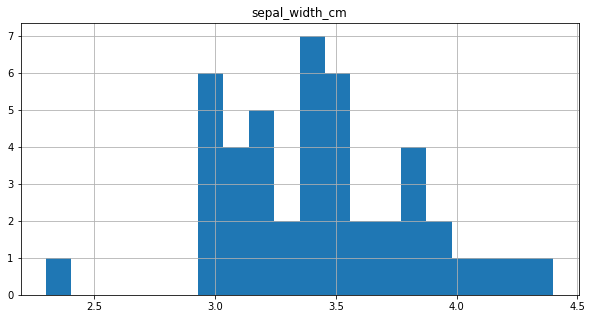

In [13]:
df = new_data[(new_data['class'] == "Iris-setosa")]
df.hist(column = 'sepal_width_cm',bins=20, figsize=(10,5))

In [14]:
new_data = new_data.drop(new_data[(new_data['class'] == "Iris-setosa") & (new_data['sepal_width_cm'] < 2.5)].index)

In [15]:
new_data['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True) #заменим названия классов на [0,1]
new_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Начинаем строить модель

In [53]:
inp_data = new_data.drop(new_data.columns[[4]], axis=1)
out_data = new_data.drop(new_data.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler() # стандартизация функций путем удаления среднего и масштабирование до единичной дисперсии
inp_data = scaler.fit_transform(inp_data) 
#
X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42) # разбиваем на test и train

In [54]:
X_tr_arr = X_train
X_ts_arr = X_test
# приводим к матричному виду
y_tr_arr = y_train.values 
y_ts_arr = y_test.values 

In [10]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features)) 
    b = 0
    return w,b

In [57]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result)) # сигмоида
    return final_result


def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Делаем прогноз
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    
    
    # Считаем градиент
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [58]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        
        grads, cost = model_optimize(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        # Обновляем веса 
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        
        if (i % 100 == 0):
            costs.append(cost)
        
    
    # Конечные параметры
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [59]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [61]:
# Получаем количество признаков
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
# Градиентный спуск
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
# Финальный прогноз
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.13397714  0.13130132 -0.18248682 -0.18319564]]
Optimized intercept -0.024134631921343585
Training Accuracy 1.0
Test Accuracy 1.0


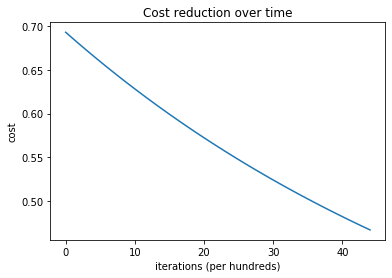

In [62]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()